In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np


import wquantiles
import seaborn as sns


In [2]:
# AIRLINE_STATS_CSV ->'airline_stats.csv'
# KC_TAX_CSV -> data/'kc_tax.csv.gz'
# LC_LOANS_CSV -> data / 'lc_loans.csv'
# AIRPORT_DELAYS_CSV -> data / 'dfw_airline.csv'
# SP500_DATA_CSV -> data / 'sp500_data.csv.gz'
# SP500_SECTORS_CSV -> data / 'sp500_sectors.csv'
# STATE_CSV -> data / 'state.csv'

In [3]:
state = pd.read_csv('./data/airline_stats.csv')
state.head(4)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American


In [4]:
state = pd.read_csv("./data/state.csv")
state.head(4)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR


In [5]:
t = state['Murder.Rate']
t.mean()
t.median()

4.066

4.0

In [6]:
from scipy.stats import trim_mean
from statsmodels import robust

In [7]:
trim_mean(t,0.1)
trim_mean(t,0.25)

3.9450000000000003

3.946153846153846

In [8]:
np.average(t)
t.mean()

4.066

4.066

In [9]:
np.average(t, weights=state['Population'])

4.445833981123393

In [10]:
t.std()

1.915736124302923

In [11]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
robust.scale.mad(state['Population'])
abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817

4847308.0

3849876.1459979336

3849876.1459979336

In [12]:
t.quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [13]:
import matplotlib.pylab as plt

Text(0, 0.5, 'Population - M')

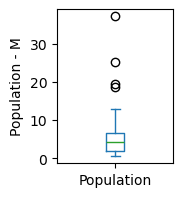

In [14]:
p = state['Population']

ax = (p/1_000_000).plot.box(figsize=(1.5, 2))
ax.set_ylabel('Population - M')
# plt.tight_layout()
plt.show()

In [15]:
bin_p = pd.cut(p, 10)
bin_p.head(3)

0    (4232659.0, 7901692.0]
1    (526935.67, 4232659.0]
2    (4232659.0, 7901692.0]
Name: Population, dtype: category
Categories (10, interval[float64, right]): [(526935.67, 4232659.0] < (4232659.0, 7901692.0] < (7901692.0, 11570725.0] < (11570725.0, 15239758.0] ... (22577824.0, 26246857.0] < (26246857.0, 29915890.0] < (29915890.0, 33584923.0] < (33584923.0, 37253956.0]]

In [16]:
bin_p.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

In [17]:
bin_p.name = "bin_pp"
df = pd.concat([state,bin_p], axis = 1)
df = df.sort_values(by='bin_pp')

In [18]:
df.head(3)

,State,Population,Murder.Rate,Abbreviation,bin_pp
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
27,Nevada,2700551,6.0,NV,"(526935.67, 4232659.0]"
23,Mississippi,2967297,8.6,MS,"(526935.67, 4232659.0]"


In [19]:
df.groupby(by='bin_pp', observed=False)

In [20]:
groups = []
for group, subset in df.groupby(by='bin_pp', observed=False):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
    # subset.Abbreviation
    # subset
    # group
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,NV,MS,NH,NM,ND,OK,ME,OR,RI,KS,IA,MT,NE,ID,H...  
1          TN,WA,SC,AL,MN,AZ,CO,IN,WI,LA,MD,KY,MA,MO  
2                                  NC,GA,MI,VA,NJ,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

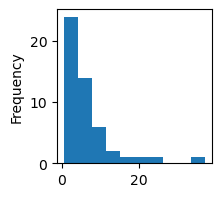

In [21]:
ax = (p / 1_000_000).plot.hist(figsize=(2, 2))
# ax.set_xlabel('Population M')
# plt.tight_layout()
# plt.show()

<Axes: ylabel='Density'>

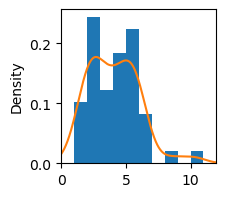

In [22]:
ax = t.plot.hist(density=True, xlim=[0, 12], bins=range(1,12), figsize=(2, 2))
t.plot.density(ax=ax)

In [23]:
dfw = pd.read_csv('./data/dfw_airline.csv')

dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [24]:
dfw.values

array([[ 64263.16,  84856.5 ,  11235.42,    343.15, 118427.82]])

In [25]:
print(dfw / dfw.values.sum()*100)

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


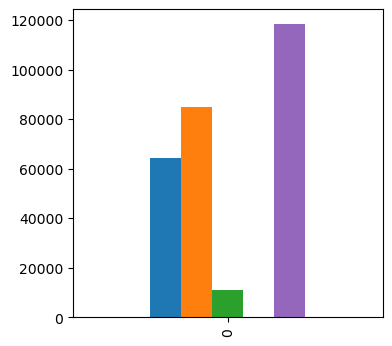

In [26]:
ax = dfw.plot.bar(figsize=(4, 4), legend=False)

In [27]:
dfw.transpose()

,0
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


<Axes: >

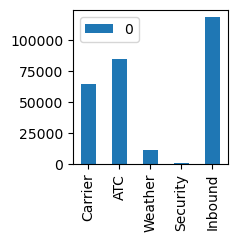

In [28]:
dfw.transpose().plot.bar(figsize=(2,2))

In [29]:
sp500_sym = pd.read_csv('./data/sp500_sectors.csv')
sp500_px = pd.read_csv('./data/sp500_data.csv.gz',index_col = 0)

In [30]:
sp500_sym.shape
sp500_px.shape

(517, 4)

(5647, 517)

In [31]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
print(telecomSymbols)
# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object


,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [32]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head(3)

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.00,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.25,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.07,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211


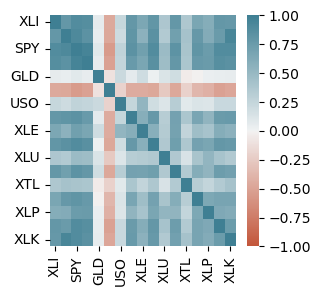

In [33]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

In [34]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

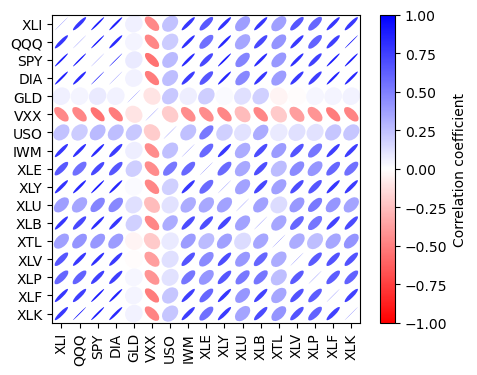

In [35]:
def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = plt.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')


Text(0.5, 0, 'ATT (T)')

Text(0, 0.5, 'Verizon (VZ)')

Line2D(_child2)


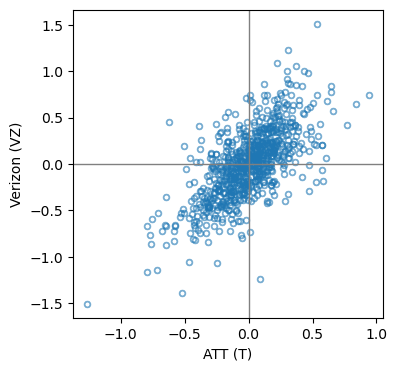

In [36]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

In [37]:
kc_tax = pd.read_csv('./data/kc_tax.csv.gz')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

Text(0.5, 0, 'Finished Square Feet')

Text(0, 0.5, 'Tax Assessed Value')

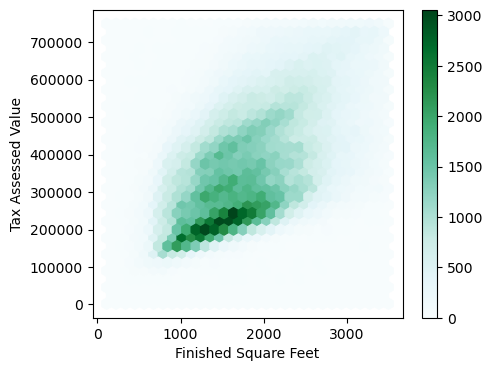

In [38]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')


<Axes: xlabel='SqFtTotLiving', ylabel='TaxAssessedValue'>

Text(0.5, 0, 'Finished Square Feet')

Text(0, 0.5, 'Tax Assessed Value')

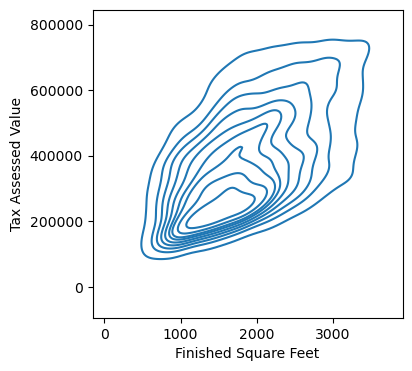

In [78]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

In [82]:
lc_loans = pd.read_csv('./data/lc_loans.csv')
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)

In [84]:
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [86]:
df = crosstab.copy().loc['A':'G',:].astype(float)
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df

In [88]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


Text(0.5, 0, '')

Text(0, 0.5, 'Daily % of Delayed Flights')

Text(0.5, 0.98, '')

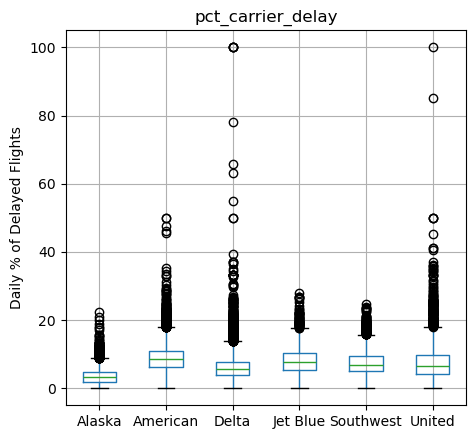

In [96]:
airline_stats = pd.read_csv('./data/airline_stats.csv')
airline_stats.head()
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

Text(0.5, 0, '')

Text(0, 0.5, 'Daily % of Delayed Flights')

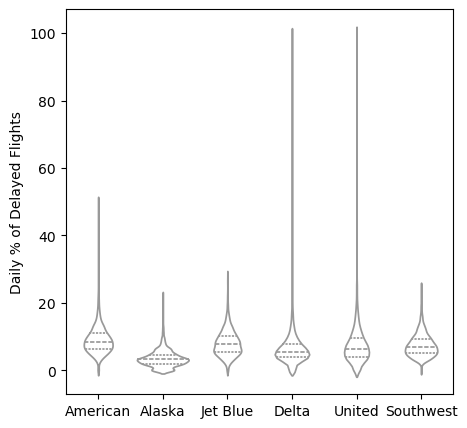

In [100]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


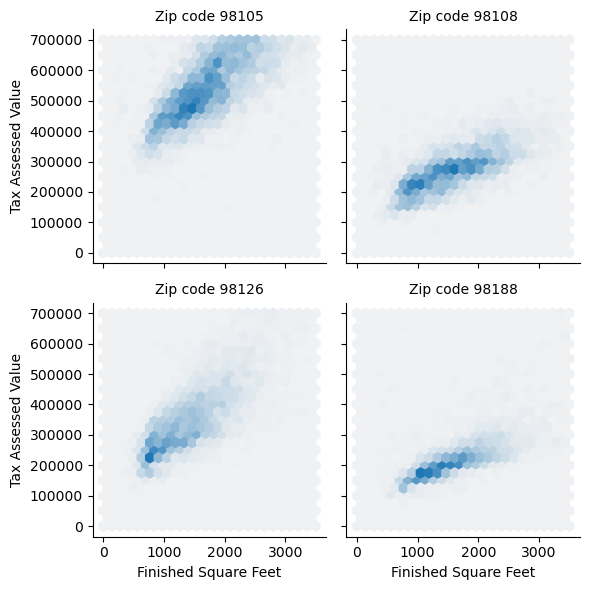

In [102]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')